# Projet 2 : Analyser des données de sustèmes éducatifs

## Importation de librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploration du fichier : "EdStatsData.csv"

In [2]:
df3 =  pd.read_csv("EdStatsData.csv")

Taille du fichier

In [3]:
df3.shape

(886930, 70)

In [4]:
df3.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nom de colonne

In [5]:
df3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

## Valeur manquante

In [6]:
# Null rate fraction per columns
null_rate = pd.DataFrame( data=df3.isna().sum().values.reshape(1,-1)/len(df3), 
             columns=df3.columns )
null_rate

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,0.0,0.0,0.0,0.0,0.918496,0.959933,0.95984,0.959924,0.959715,0.901564,...,0.942007,0.942007,0.942007,0.942007,0.942007,0.942007,0.942007,0.942007,0.942007,1.0


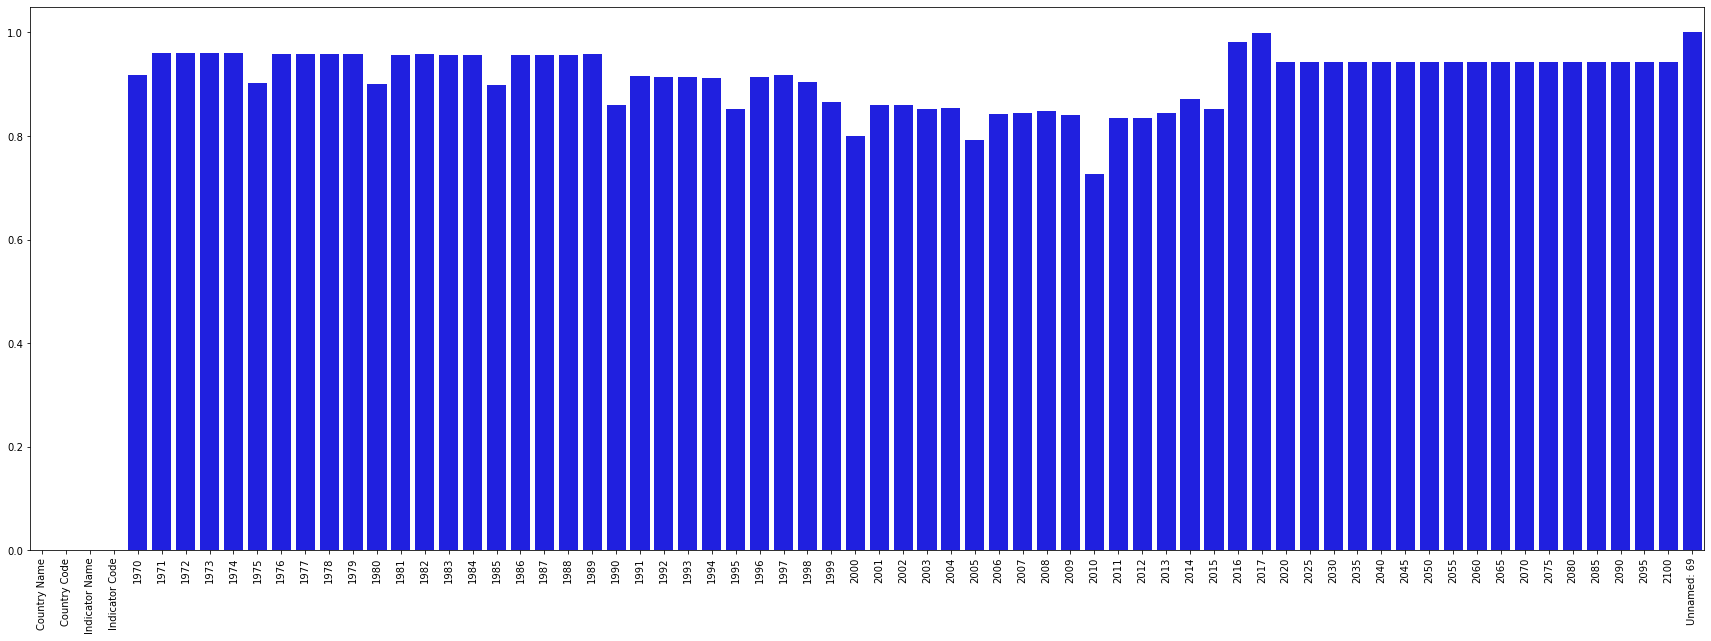

In [8]:
fig,ax = plt.subplots()
plt.rcParams["figure.figsize"] = (30,10)
sns.barplot( data=null_rate, color = 'blue')
ax.tick_params(axis='x', rotation=90)

On filtre les colonnes selon celles qui ont le plus de données et on examie les indicateurs.

In [9]:
r_min = null_rate.iloc[:,4:].min(axis=1).tolist()[0]
r_min

0.7266503557214211

La valeur retenu est 0.72 % et on voit que la colonne avec le plus d'information est l'année 2010

In [10]:
import time
%time
col_min = list( filter(lambda c: null_rate.loc[0, c]==r_min,
                      null_rate.columns) )
col_min

CPU times: total: 0 ns
Wall time: 0 ns


['2010']

On regarde les indicateurs avec le plus d'information

In [11]:
df3.groupby( df3["Indicator Name"] ).count()\
    .sort_values(by=["2010"], ascending=False).reset_index()[["Indicator Name", "2010"]]

,Indicator Name,2010
0,"Population, total",240
1,Population growth (annual %),240
2,GDP at market prices (current US$),228
3,GDP per capita (current US$),228
4,GDP at market prices (constant 2005 US$),227
...,...,...
3660,EGRA: Reading Comprehension - Share of student...,0
3661,EGRA: Reading Comprehension - Share of student...,0
3662,EGRA: Identification of the Initial Sound of a...,0
3663,EGRA: Identification of the Initial Sound of a...,0


In [12]:
ddf = df3.groupby( df3["Indicator Name"] )\
    .count()\
    .sort_values(by=col_min, ascending=False)

df3_indic_fill = ddf[col_min].reset_index()
df3_indic_fill.columns=["Indicator Name", "count_2010"]
df3_indic_fill.head(30)

,Indicator Name,count_2010
0,"Population, total",240
1,Population growth (annual %),240
2,GDP at market prices (current US$),228
3,GDP per capita (current US$),228
4,GDP at market prices (constant 2005 US$),227
5,GDP per capita (constant 2005 US$),227
6,Internet users (per 100 people),227
7,Total outbound internationally mobile tertiary...,222
8,Population of the official age for upper secon...,220
9,"Population, female",219


On sélectionne les indicateurs qui semblent pertinent.

In [13]:
select_ind = df3_indic_fill["Indicator Name"][:4].tolist()
select_ind.extend( ["Internet users (per 100 people)", "GNI (current US$)"] )
select_ind

['Population, total',
 'Population growth (annual %)',
 'GDP at market prices (current US$)',
 'GDP per capita (current US$)',
 'Internet users (per 100 people)',
 'GNI (current US$)']

In [14]:
indic_search = [c for c in df3_indic_fill["Indicator Name"].str.lower() 
 if ( ("secondary" in c) | ("tertiary" in c) | ("population,"in c) ) ]

df3_search = (df3_indic_fill[ df3_indic_fill["Indicator Name"]\
                .str.lower().isin(indic_search)] \
                .loc[df3_indic_fill["count_2010"]>100, :]
             )

In [15]:
df3_search.head(200)

,Indicator Name,count_2010
0,"Population, total",240
7,Total outbound internationally mobile tertiary...,222
8,Population of the official age for upper secon...,220
9,"Population, female",219
10,"Population, ages 0-14 (% of total)",219
...,...,...
246,"Population, ages 10-17, male",181
247,"Population, ages 10-17, total",181
248,"Population, ages 10-18, female",181
249,"Population, age 7, male",181


In [16]:
indic_search = [ e for e in indic_search if not "wittgenstein projection:" in e ]

In [17]:
df3_search = df3_search[ df3_search["Indicator Name"].str.lower().isin(indic_search)]
df3_search   

,Indicator Name,count_2010
0,"Population, total",240
7,Total outbound internationally mobile tertiary...,222
8,Population of the official age for upper secon...,220
9,"Population, female",219
10,"Population, ages 0-14 (% of total)",219
...,...,...
1300,Government expenditure in secondary institutio...,102
1301,Pupil-teacher ratio in upper secondary educati...,102
1303,Rate of out-of-school adolescents of lower sec...,101
1304,Rate of out-of-school adolescents of lower sec...,101


Choix des indicateurs

In [18]:
select_ind.extend(
["Population of the official age for secondary education, both sexes (number)",
 "Population of the official age for tertiary education, both sexes (number)",
 "Enrolment in secondary general, both sexes (number)",
 "Enrolment in tertiary education, all programmes, both sexes (number)",
 "Population, ages 15-64, total",
 "Population, ages 13-19, total"]
)

In [19]:
select_ind

['Population, total',
 'Population growth (annual %)',
 'GDP at market prices (current US$)',
 'GDP per capita (current US$)',
 'Internet users (per 100 people)',
 'GNI (current US$)',
 'Population of the official age for secondary education, both sexes (number)',
 'Population of the official age for tertiary education, both sexes (number)',
 'Enrolment in secondary general, both sexes (number)',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'Population, ages 15-64, total',
 'Population, ages 13-19, total']

In [20]:
sel_df3 = df3[ df3["Indicator Name"].isin(select_ind) ]\
            .drop(columns=["Unnamed: 69"])

In [21]:
# Computing the Null values per column after indocator selection
null_rate2 = pd.DataFrame( data=sel_df3.isna().sum().values.reshape(1,-1)/len(sel_df3), 
             columns=sel_df3.columns )
null_rate2

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,0.0,0.0,0.0,0.0,0.416667,0.352617,0.354339,0.353994,0.356405,0.355028,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


On regarde à nouveau les valeurs manquantes

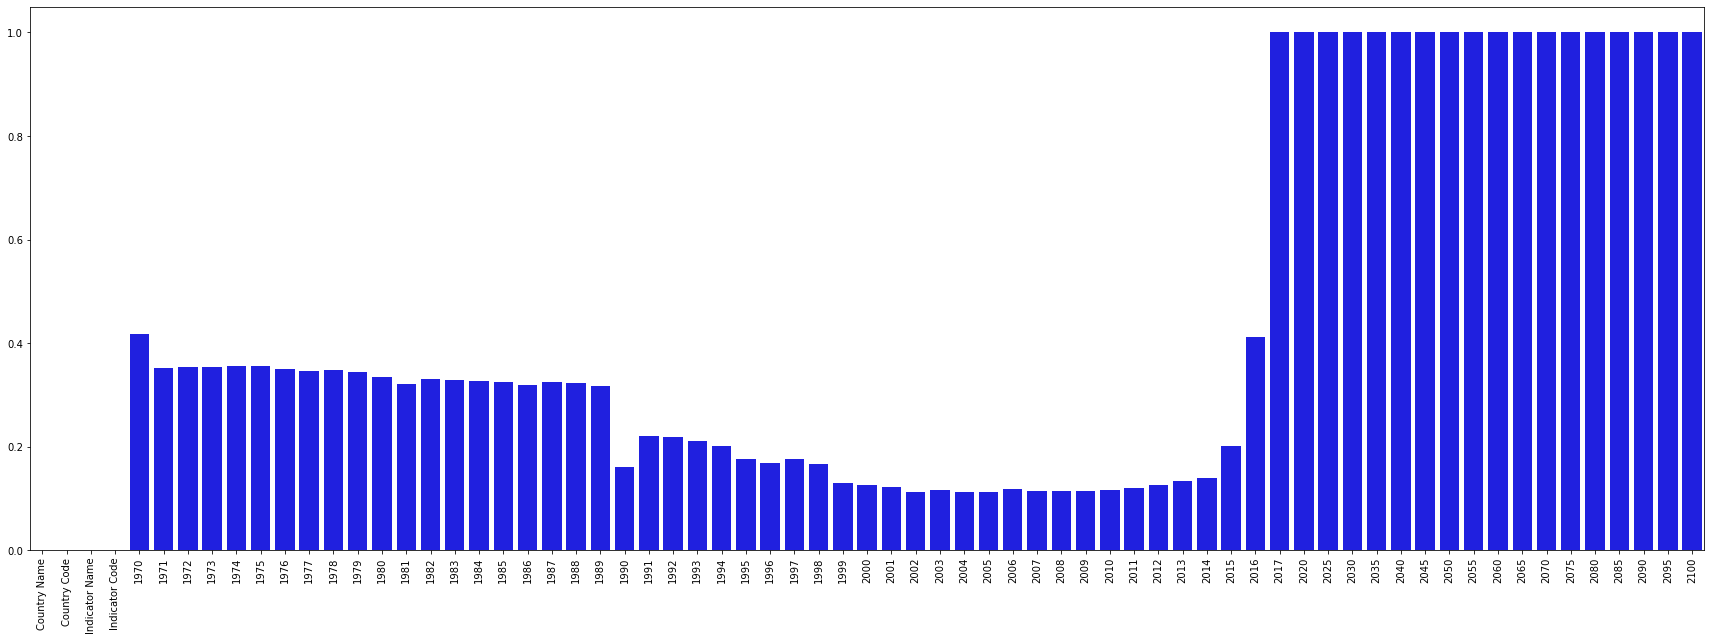

In [22]:
fig, ax = plt.subplots()
sns.barplot( data=null_rate2, color = 'blue')
ax.tick_params(axis='x', rotation=90)

Sélection des colonnes pertinantes

In [23]:
# Selecting columns with null values less than the threshold.
sel_cols=[ x for x in null_rate2.columns if null_rate2.loc[0,x]<.15 ]
sel_cols  

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [24]:
# Recalculating the sub-sample.
sel_df3 = sel_df3[sel_cols]
sel_df3.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1197,Arab World,ARB,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,1.919889e+07,1.995524e+07,2.078723e+07,2.157428e+07,2.313734e+07,2.403455e+07,2.462060e+07,2.509795e+07,2.563687e+07,2.615166e+07,2.696901e+07,2.748319e+07,2.837384e+07,2.876566e+07,2.820554e+07,28054448.0
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,4.875952e+06,5.089854e+06,5.400639e+06,5.798696e+06,5.955514e+06,6.465715e+06,6.899156e+06,7.214648e+06,7.588664e+06,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9966484.0
1243,Arab World,ARB,GDP at market prices (current US$),NY.GDP.MKTP.CD,6.341186e+11,7.260126e+11,7.130072e+11,7.240099e+11,8.155385e+11,9.594050e+11,1.176100e+12,1.399823e+12,1.638669e+12,2.079571e+12,1.791753e+12,2.097884e+12,2.487905e+12,2.744381e+12,2.853079e+12,NaN


## Suppression des doublons

In [25]:
len(sel_df3), len(sel_df3.drop_duplicates())

(2904, 2904)

## Examen des valeurs

Nombre d'habitant, on limite le nombre de la population doit être supérieur à 1 millions

In [26]:
pop_info = sel_df3.loc[
    (sel_df3["Indicator Name"]=='Population, total') & (sel_df3["2010"]>1.e6), 
    ["Country Name", "Country Code", "Indicator Name",
     "Indicator Code", "2014"]]
pop_info = pop_info.sort_values(by=["2014"], ascending=False)

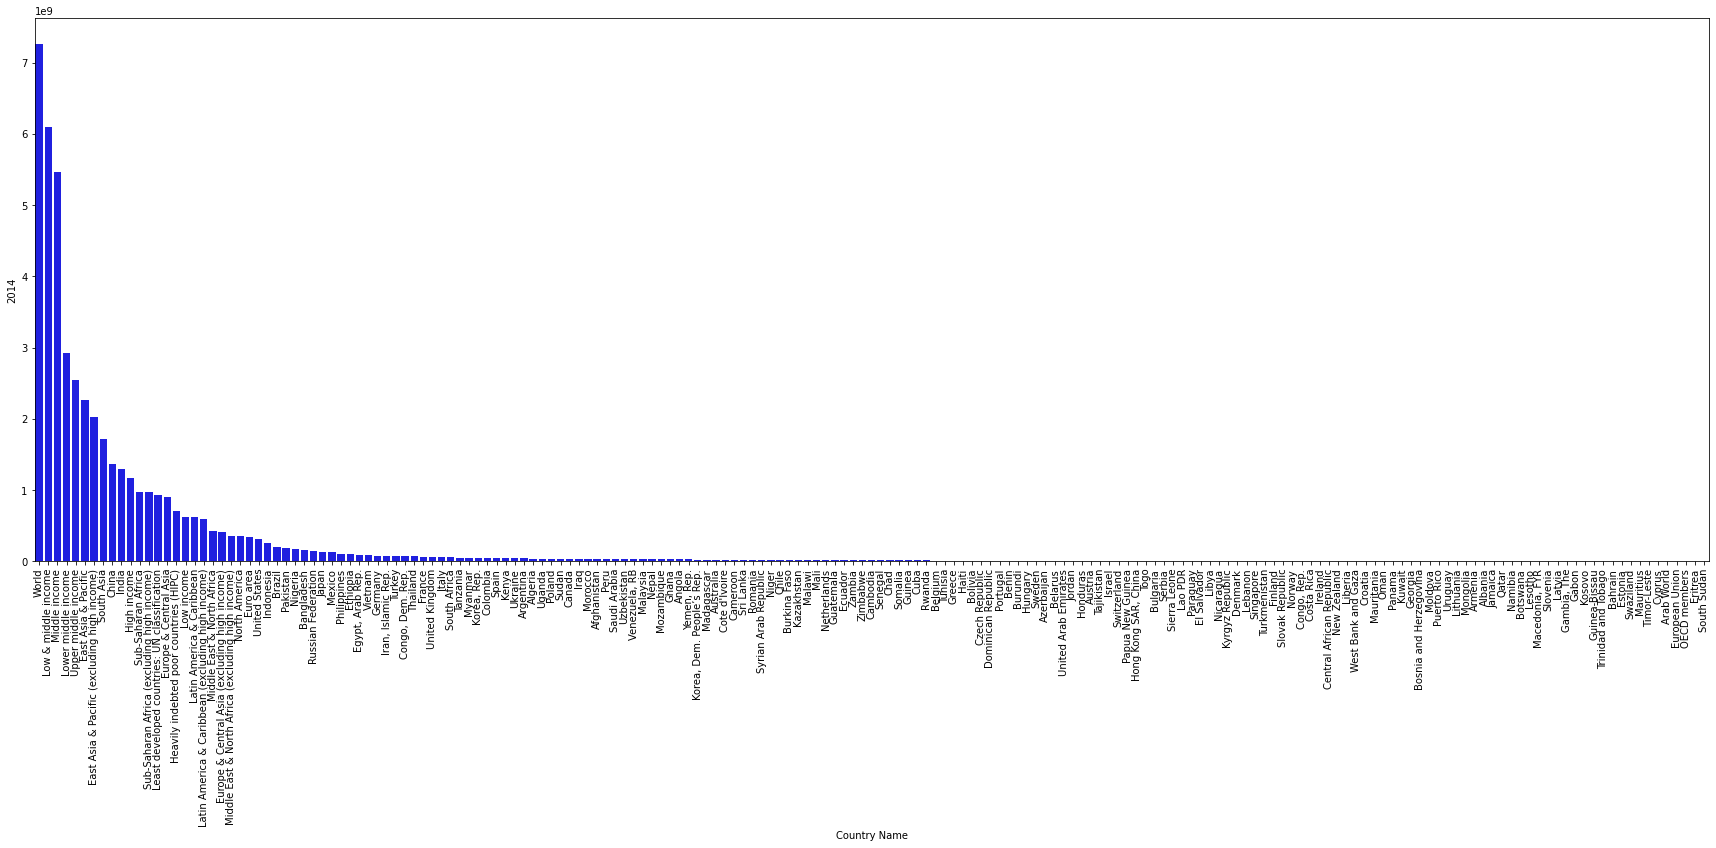

In [27]:
fig, ax = plt.subplots()

sns.barplot( data=pop_info, x="Country Name", y="2014", color = 'blue' )
ax.tick_params(axis='x', rotation=90)
#pop_info

Scoring
===

On comble les valeurs manquantes en reportant les valeurs manquantes sur l'années précédentes.

In [28]:
data = sel_df3.copy()
data = data.dropna(thresh=int(len(data.columns)/2))
data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1197,Arab World,ARB,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,1.919889e+07,1.995524e+07,2.078723e+07,2.157428e+07,2.313734e+07,2.403455e+07,2.462060e+07,2.509795e+07,2.563687e+07,2.615166e+07,2.696901e+07,2.748319e+07,2.837384e+07,2.876566e+07,2.820554e+07,28054448.0
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,4.875952e+06,5.089854e+06,5.400639e+06,5.798696e+06,5.955514e+06,6.465715e+06,6.899156e+06,7.214648e+06,7.588664e+06,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9966484.0
1243,Arab World,ARB,GDP at market prices (current US$),NY.GDP.MKTP.CD,6.341186e+11,7.260126e+11,7.130072e+11,7.240099e+11,8.155385e+11,9.594050e+11,1.176100e+12,1.399823e+12,1.638669e+12,2.079571e+12,1.791753e+12,2.097884e+12,2.487905e+12,2.744381e+12,2.853079e+12,NaN


On prend la dernière année en référence

In [29]:
data["ref"] = data["2014"]

In [30]:
cols = list(data.columns)[4:-1]
cols = sorted(cols, reverse=True)
cols, len(cols)

(['2014',
  '2013',
  '2012',
  '2011',
  '2010',
  '2009',
  '2008',
  '2007',
  '2006',
  '2005',
  '2004',
  '2003',
  '2002',
  '2001',
  '2000',
  '1999'],
 16)

In [31]:
# replacing the null values of the refrence by a the most recent data
i = 0
while data["ref"].isnull().sum()>0  : 
    data["ref"] = np.where( data["ref"].isnull(), 
                       data[cols[i]], data["ref"] )
    i += 1
    if( i == len(cols) ) : 
        print("All are nulls!")
        break

In [32]:
data["ref"].isnull().sum()

0

In [33]:
data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,ref
1197,Arab World,ARB,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,1.919889e+07,1.995524e+07,2.078723e+07,2.157428e+07,2.313734e+07,2.403455e+07,...,2.509795e+07,2.563687e+07,2.615166e+07,2.696901e+07,2.748319e+07,2.837384e+07,2.876566e+07,2.820554e+07,28054448.0,2.805445e+07
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,4.875952e+06,5.089854e+06,5.400639e+06,5.798696e+06,5.955514e+06,6.465715e+06,...,7.214648e+06,7.588664e+06,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9966484.0,9.966484e+06
1243,Arab World,ARB,GDP at market prices (current US$),NY.GDP.MKTP.CD,6.341186e+11,7.260126e+11,7.130072e+11,7.240099e+11,8.155385e+11,9.594050e+11,...,1.399823e+12,1.638669e+12,2.079571e+12,1.791753e+12,2.097884e+12,2.487905e+12,2.744381e+12,2.853079e+12,NaN,2.853079e+12


On regarde les différents pays selon la taille de la population

In [34]:
pop_info = data.loc[data["Indicator Code"]=="SP.POP.TOTL", 
                    ["Country Name", "ref"]]\
    .sort_values(by="ref", ascending=False)\
    .reset_index(drop=True)
pop_info

,Country Name,ref
0,World,7.268986e+09
1,Low & middle income,6.093020e+09
2,Middle income,5.468260e+09
3,Lower middle income,2.927194e+09
4,Upper middle income,2.541065e+09
...,...,...
235,Turks and Caicos Islands,3.373900e+04
236,San Marino,3.265700e+04
237,St. Martin (French part),3.126400e+04
238,Palau,2.109400e+04


On retire les pays de type "monde" etc

In [35]:
regions = pop_info["Country Name"][:8].to_list()
regions.extend( pop_info["Country Name"][10:27] )
regions

['World',
 'Low & middle income',
 'Middle income',
 'Lower middle income',
 'Upper middle income',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'South Asia',
 'OECD members',
 'High income',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Least developed countries: UN classification',
 'Europe & Central Asia',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'European Union',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'Arab World',
 'Middle East & North Africa (excluding high income)',
 'North America',
 'Euro area']

In [36]:
data_country = data[ ~data["Country Name"].isin(regions)].copy()

In [37]:
piv_cols = ["Country Name", "Indicator Code", "ref"]
data_piv = data_country[piv_cols].reset_index(drop=True)
data_piv.head(5)

,Country Name,Indicator Code,ref
0,Afghanistan,SE.SEC.ENRL.GC,2.577715e+06
1,Afghanistan,NY.GDP.MKTP.CD,2.005019e+10
2,Afghanistan,NY.GDP.PCAP.CD,6.120697e+02
3,Afghanistan,NY.GNP.MKTP.CD,2.023030e+10
4,Afghanistan,IT.NET.USER.P2,7.000000e+00


On utilise la fonction "pivot" pour avoir les indicateurs en colonnes et l'année de références. Les lignes sont les pays. Ce fichier sera sauvegardé.

In [38]:
data_ref = pd.pivot(data_piv, 
                    index="Country Name", 
                    columns="Indicator Code",
                    values="ref")\
            .dropna()\
            .reset_index()
data_ref.head()

Indicator Code,Country Name,IT.NET.USER.P2,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,NY.GNP.MKTP.CD,SE.SEC.ENRL.GC,SE.TER.ENRL,SP.POP.1319.TO.UN,SP.POP.1564.TO,SP.POP.GROW,SP.POP.TOTL,SP.SEC.TOTL.IN,SP.TER.TOTL.IN
0,Albania,60.100000,1.322824e+10,4578.666728,1.306987e+10,306610.0,173819.0,370794.0,1996460.0,-0.207047,2889104.0,345644.0,277193.0
1,Algeria,29.500000,2.138100e+11,5466.425778,2.091643e+11,4132124.0,1245478.0,4238070.0,25800849.0,2.000666,39113313.0,4140079.0,3600292.0
2,Angola,10.200000,1.267769e+11,4709.312024,1.179270e+11,484717.0,218679.0,3196084.0,13596360.0,3.485413,26920466.0,3430540.0,2286479.0
3,Argentina,64.700000,5.263197e+11,12245.256449,5.155829e+11,4450741.0,2869450.0,4784951.0,27440753.0,1.032709,42981515.0,4168223.0,3460613.0
4,Armenia,54.622806,1.160951e+10,3994.712355,1.215031e+10,217929.0,113090.0,268682.0,2017975.0,0.438332,2906220.0,324164.0,255544.0


## Construction du deuxième fichier

On supprime les doublons

In [39]:
# To see code-name relationship for the indocators
data[["Indicator Code", "Indicator Name"]].drop_duplicates()

,Indicator Code,Indicator Name
1197,SE.SEC.ENRL.GC,"Enrolment in secondary general, both sexes (nu..."
1204,SE.TER.ENRL,"Enrolment in tertiary education, all programme..."
1243,NY.GDP.MKTP.CD,GDP at market prices (current US$)
1245,NY.GDP.PCAP.CD,GDP per capita (current US$)
1250,NY.GNP.MKTP.CD,GNI (current US$)
1375,IT.NET.USER.P2,Internet users (per 100 people)
2307,SP.POP.GROW,Population growth (annual %)
2323,SP.SEC.TOTL.IN,Population of the official age for secondary e...
2326,SP.TER.TOTL.IN,Population of the official age for tertiary ed...
2486,SP.POP.1564.TO,"Population, ages 15-64, total"


On regarde les distributions de chacun des indicateurs et on trie le dataframe pour garder les pays idéals pour le projet.


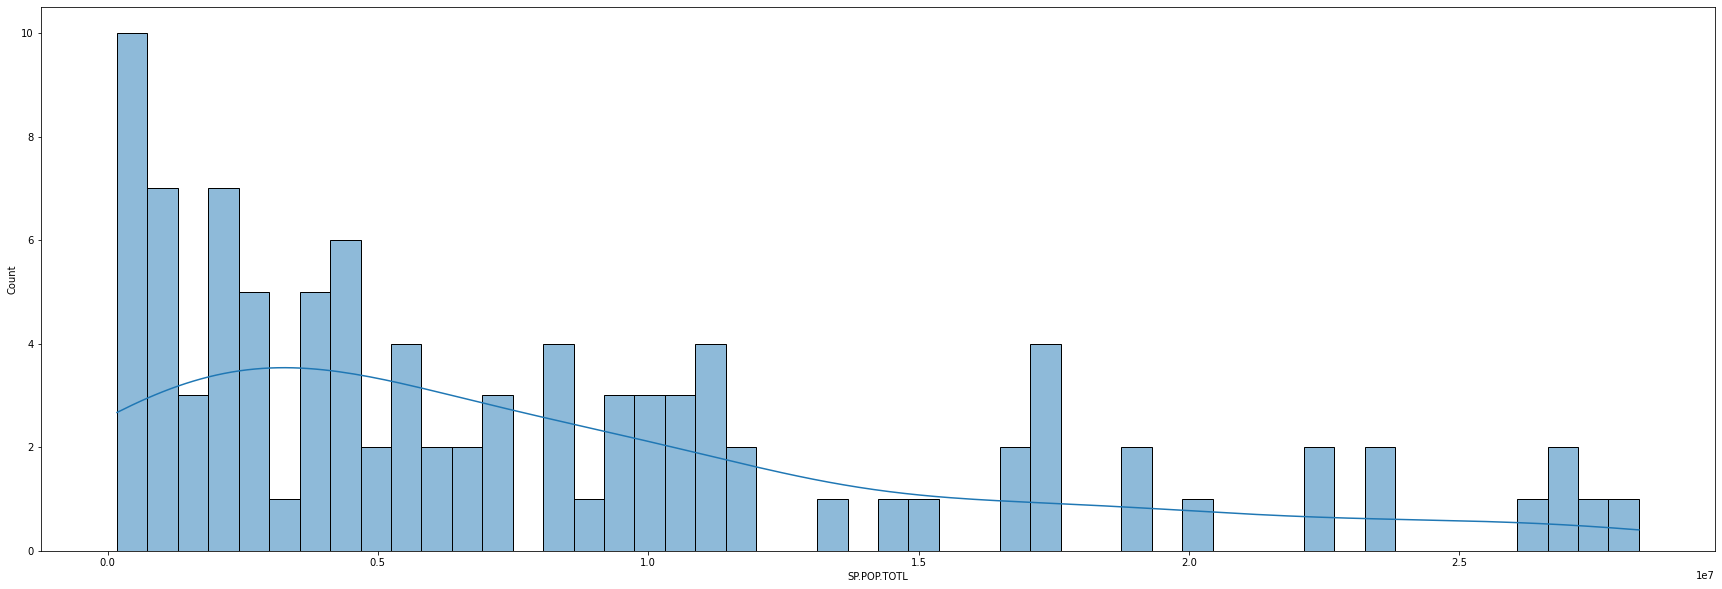

In [40]:
dft = data_ref[data_ref["SP.POP.TOTL"]<3.e7]
sns.histplot(data=dft, x="SP.POP.TOTL", bins=50, kde=True)
plt.show()

In [41]:
# Cut on population
data_ref = data_ref[data_ref["SP.POP.TOTL"]>5.e6]

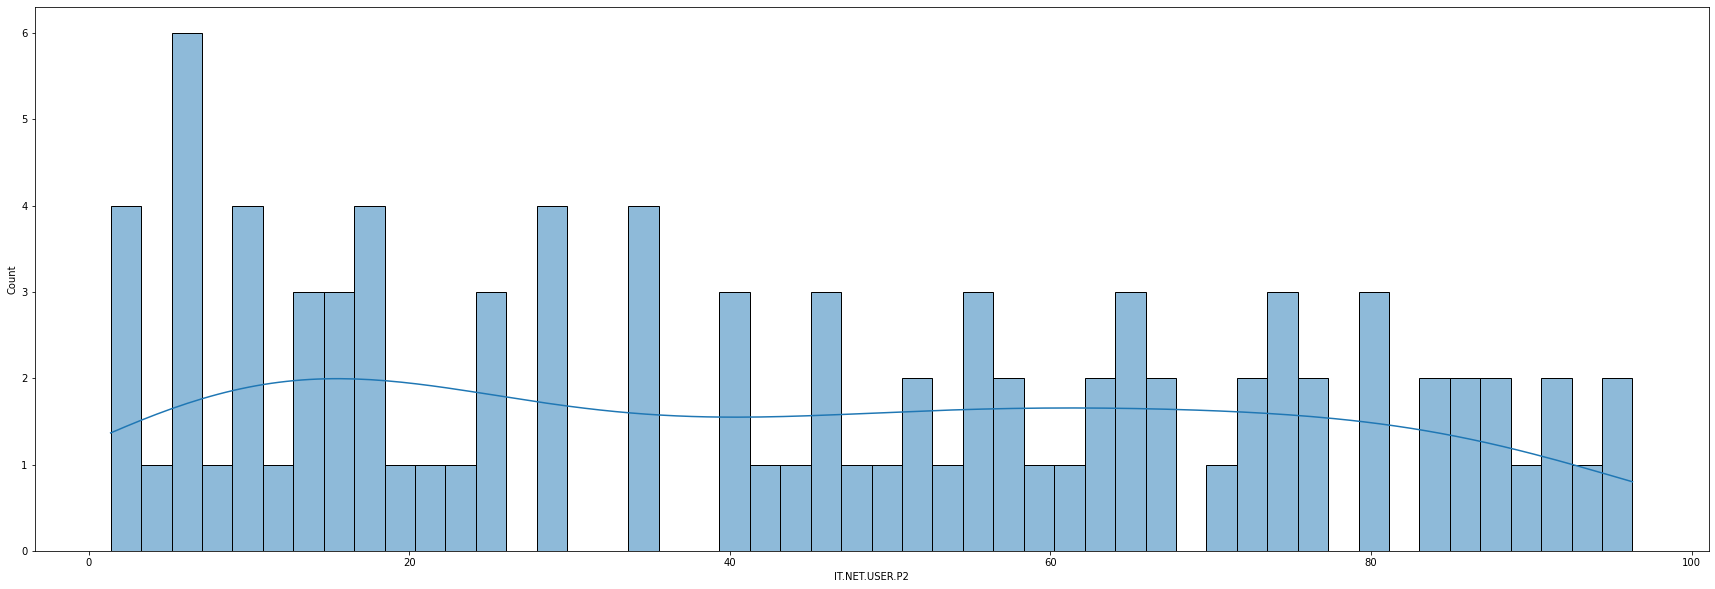

In [42]:
sns.histplot(data=data_ref, x="IT.NET.USER.P2", bins=50, kde=True)
plt.show()

Internet est important pour la suite

In [43]:
# Cut on internet users
data_ref = data_ref[data_ref["IT.NET.USER.P2"]>50]

In [44]:
# less than 50% of chinees use internet ?!
"China" in data_ref["Country Name"].to_list()

False

Le taux d'éducation secondaire est très important.

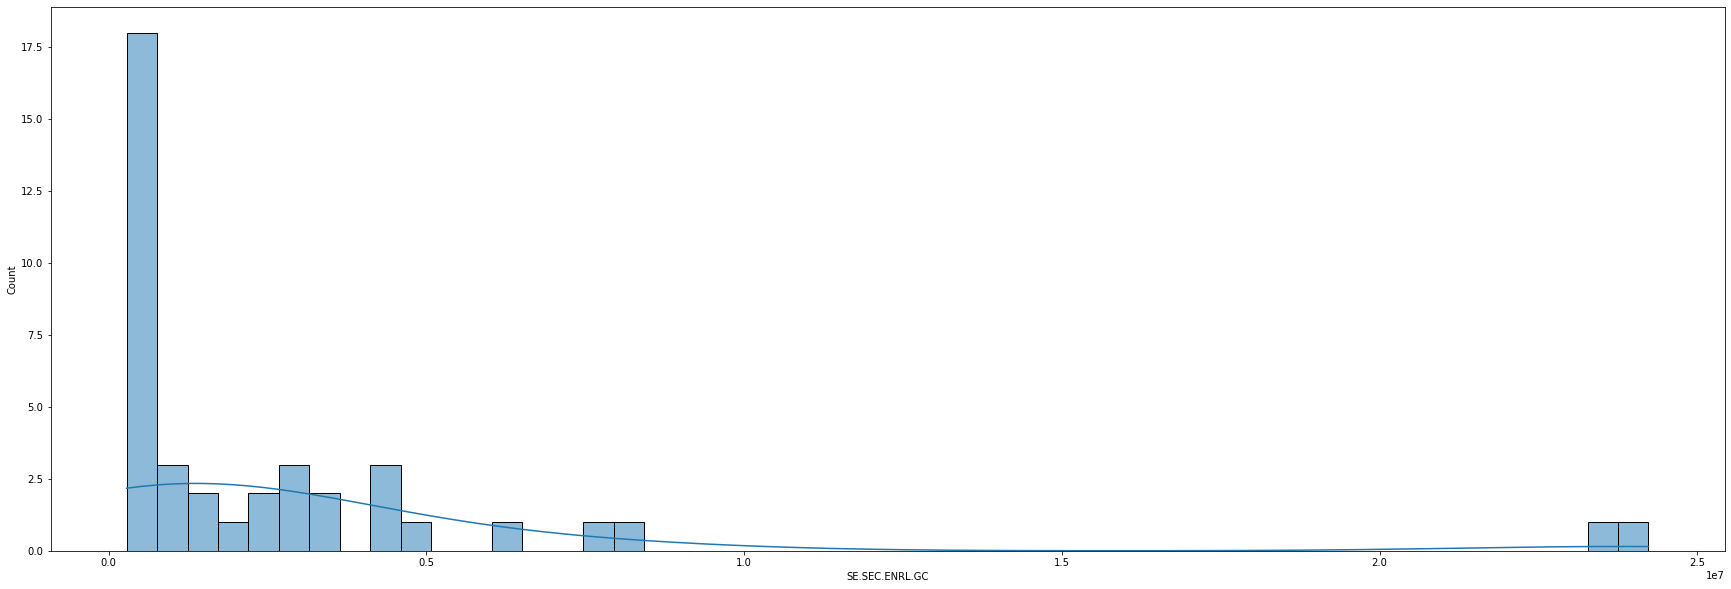

In [45]:
# Distriburion for secondary education (No outliers)
sns.histplot(data=data_ref, x="SE.SEC.ENRL.GC", bins=50, kde=True)
plt.show()

Examen des pays qui peuvent être abérrant

In [46]:
# US is not the oulier
data_ref[data_ref["SE.SEC.ENRL.GC"]>2.e7]["Country Name"]

18            Brazil
128    United States
Name: Country Name, dtype: object

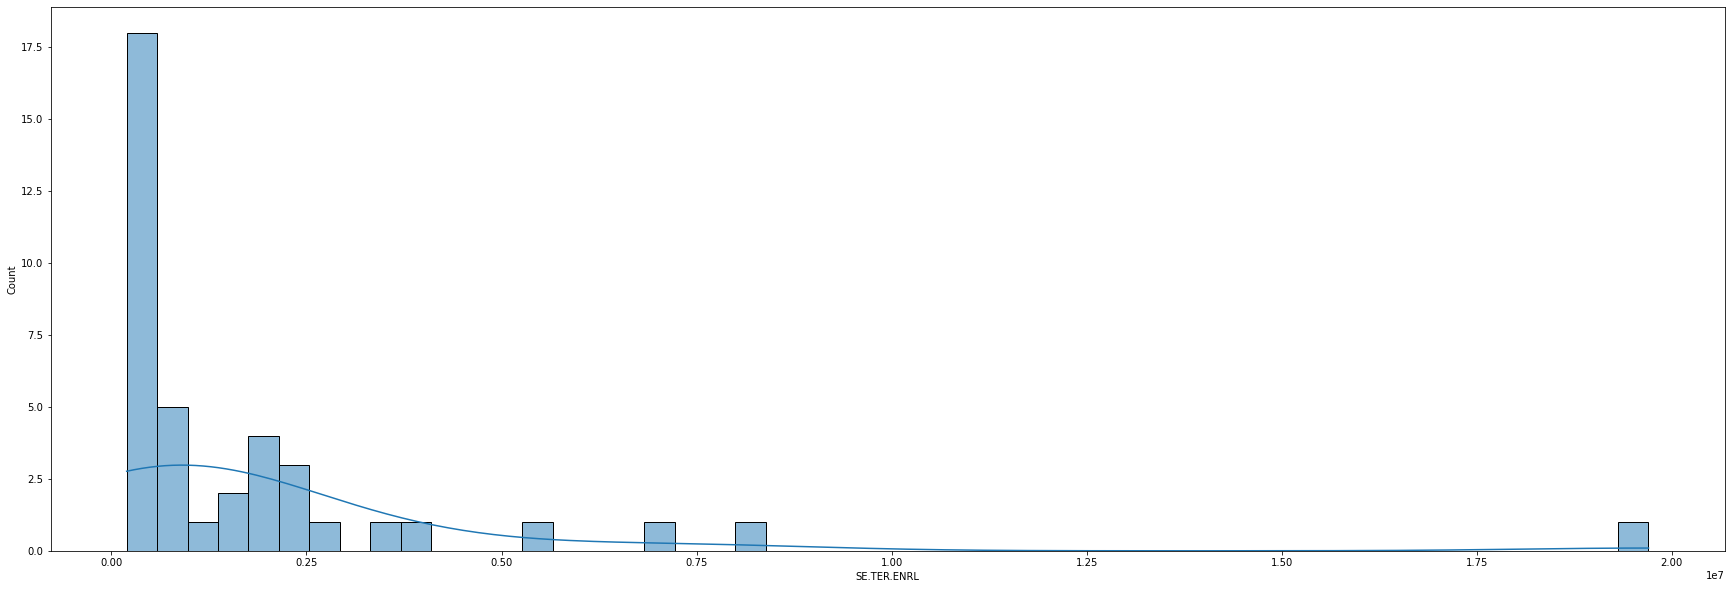

In [47]:
# Distriburion for tertiary education (# No outliers)
sns.histplot(data=data_ref, x="SE.TER.ENRL", bins=50, kde=True)
plt.show()

In [48]:
data_ref[data_ref["SE.TER.ENRL"]>1.e7]["Country Name"]

128    United States
Name: Country Name, dtype: object

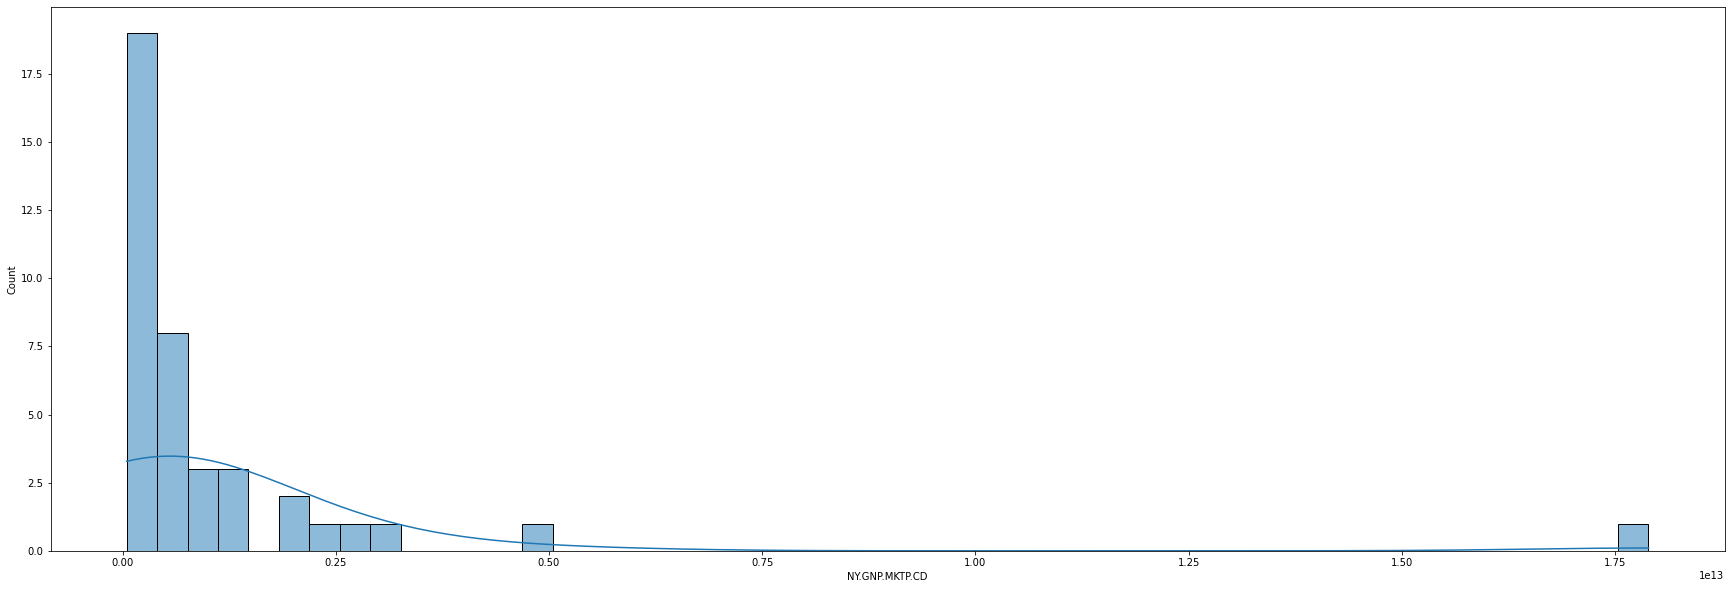

In [49]:
# Gross National Income 
sns.histplot(data=data_ref, x="NY.GNP.MKTP.CD", bins=50, kde=True)
plt.show()

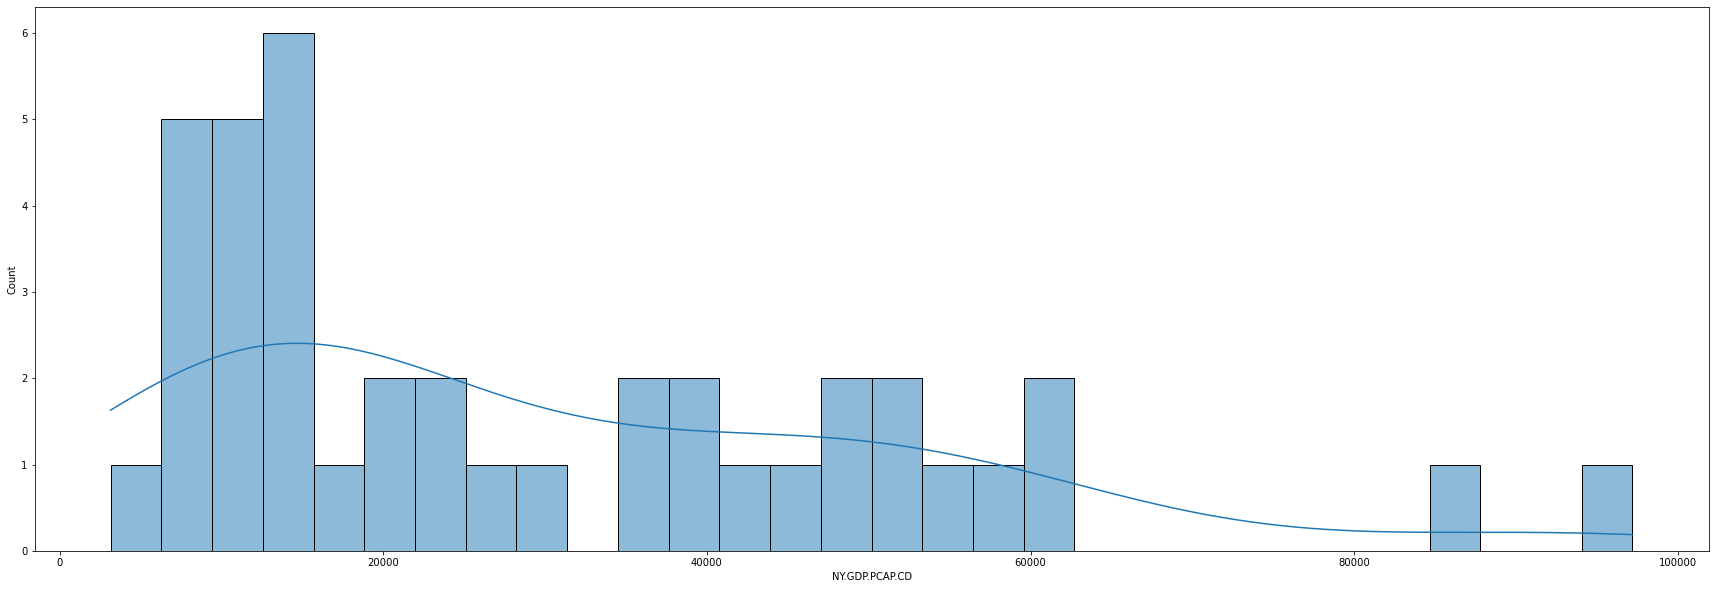

In [50]:
# GDP per capita
sns.histplot(data=data_ref, x="NY.GDP.PCAP.CD", bins=30, kde=True)
plt.show()


In [51]:
# final number of countries
len(data_ref)

40

Scoring

In [52]:
def computeScore( df, indics ) :
    """
    Computes the score acording to given indocators
    df : dataframe
    indics : list
    """
    N = len(indics)
    new_cols = [c+"_norm" for c in indics]
    for indic in indics :
        df[indic+"_norm"] = \
        (df[indic] - min(df[indic])) / (max(df[indic])- min(df[indic]))*100.
    
    df["score"] = round(df[new_cols].mean(axis=1, skipna=True ), 0) 
    df = df.sort_values( by=["score"], ascending=False )\
           .reset_index(drop=True)
    return df[["Country Name", "score"]]
    

Liste des pays avec un score, c'est la liste des pays qui sont bien pour le projet.

In [53]:
# selected indocators
inds = ["SE.SEC.ENRL.GC", "SE.TER.ENRL", "NY.GDP.PCAP.CD", 
        "NY.GNP.MKTP.CD", "SP.POP.GROW", "NY.GDP.MKTP.CD"]
computeScore( data_ref, inds )

Indicator Code,Country Name,score
0,United States,79.0
1,Brazil,33.0
2,Japan,24.0
3,United Kingdom,22.0
4,Norway,22.0
5,Switzerland,21.0
6,Australia,20.0
7,France,20.0
8,Russian Federation,19.0
9,Turkey,19.0
